__Before using the codes below, notation:__

1. for the mixture component, using a sliced-like list.
<p>eg: V_water:V_toluene:V_ethanol = [::] </p>


# Version 1

# Retrieve the wavelength for the tie-line

## Import packages and set initial parameters for the graphs

In [1]:
from dataGadgets import *

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100

# for the folder where stores the *.csv file for the different mixture.

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
Functions successfully imported!



In [2]:
# Other parameters 

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2


## Define the file path for the spectra (*.csv files)

In [3]:
specFold = 'curve_fit_tie_line/'

## set initial guess for the parameters, plot the original data and the fitted line

### For the upper and lower layer mixture Water: Toluene: Ethanol = [8.0, 5.3, 9.4]

In [34]:
# csv file format is '<*up|low>_<vol W>_<vol T>_<vol E>_<sample no>_<rep no>'

upper_raw_sample01_01 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_01.csv',6)
upper_raw_sample01_02 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_02.csv',6)
upper_raw_sample01_03 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_03.csv',6)
upper_raw_sample01_04 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_04.csv',6)
upper_raw_sample01_05 = yld_rawdata(specFold+'up_8W_5.3T_9.4E_sample01_05.csv',6)

upper_wv_sample01_01,upper_inten_sample01_01 = yld_xy_sliced(upper_raw_sample01_01)
upper_wv_sample01_02,upper_inten_sample01_02 = yld_xy_sliced(upper_raw_sample01_02)
upper_wv_sample01_03,upper_inten_sample01_03 = yld_xy_sliced(upper_raw_sample01_03)
upper_wv_sample01_04,upper_inten_sample01_04 = yld_xy_sliced(upper_raw_sample01_04)
upper_wv_sample01_05,upper_inten_sample01_05 = yld_xy_sliced(upper_raw_sample01_05)

ave_wv_sampleu01 = np.array(upper_wv_sample01_01)
ave_inten_sampleu01 = []
std_inten_sampleu01 = []
for i in range(len(upper_inten_sample01_01)):
    singlewav_inten = [upper_inten_sample01_01[i],upper_inten_sample01_02[i],upper_inten_sample01_03[i],upper_inten_sample01_04[i],upper_inten_sample01_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sampleu01.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sampleu01.append(ave_singlewav)

sample_bg_u = 470
sample_end_u = 507

ave_wv_sampleu01 = ave_wv_sampleu01[ave_wv_sampleu01>sample_bg_u-1]
ave_wv_sampleu01 = ave_wv_sampleu01[ave_wv_sampleu01<sample_end_u+1]

fit_ave_wv_sampleu01 = ave_wv_sampleu01.tolist()
ave_wv_sampleu01 = upper_wv_sample01_01

index_start = ave_wv_sampleu01.index(fit_ave_wv_sampleu01[0])
index_end = ave_wv_sampleu01.index(fit_ave_wv_sampleu01[-1])

fit_ave_inten_sampleu01 =  ave_inten_sampleu01[index_start:index_end+1]

lower_raw_sample01_01 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_01.csv',6)
lower_raw_sample01_02 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_02.csv',6)
lower_raw_sample01_03 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_03.csv',6)
lower_raw_sample01_04 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_04.csv',6)
lower_raw_sample01_05 = yld_rawdata(specFold+'low_8W_5.3T_9.4E_sample01_05.csv',6)

lower_wv_sample01_01,lower_inten_sample01_01 = yld_xy_sliced(lower_raw_sample01_01)
lower_wv_sample01_02,lower_inten_sample01_02 = yld_xy_sliced(lower_raw_sample01_02)
lower_wv_sample01_03,lower_inten_sample01_03 = yld_xy_sliced(lower_raw_sample01_03)
lower_wv_sample01_04,lower_inten_sample01_04 = yld_xy_sliced(lower_raw_sample01_04)
lower_wv_sample01_05,lower_inten_sample01_05 = yld_xy_sliced(lower_raw_sample01_05)

ave_wv_samplel01 = np.array(lower_wv_sample01_01)
ave_inten_samplel01 = []
std_inten_samplel01 = []
for i in range(len(lower_inten_sample01_01)):
    singlewav_inten = [lower_inten_sample01_01[i],lower_inten_sample01_02[i],lower_inten_sample01_03[i],lower_inten_sample01_04[i],lower_inten_sample01_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_samplel01.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_samplel01.append(ave_singlewav)

sample_bg_l = 490
sample_end_l = 534

ave_wv_samplel01 = ave_wv_samplel01[ave_wv_samplel01>sample_bg_l-1]
ave_wv_samplel01 = ave_wv_samplel01[ave_wv_samplel01<sample_end_l+1]

fit_ave_wv_samplel01 = ave_wv_samplel01.tolist()
ave_wv_samplel01 = lower_wv_sample01_01

index_start = ave_wv_samplel01.index(fit_ave_wv_samplel01[0])
index_end = ave_wv_samplel01.index(fit_ave_wv_samplel01[-1])

fit_ave_inten_samplel01 =  ave_inten_samplel01[index_start:index_end+1]

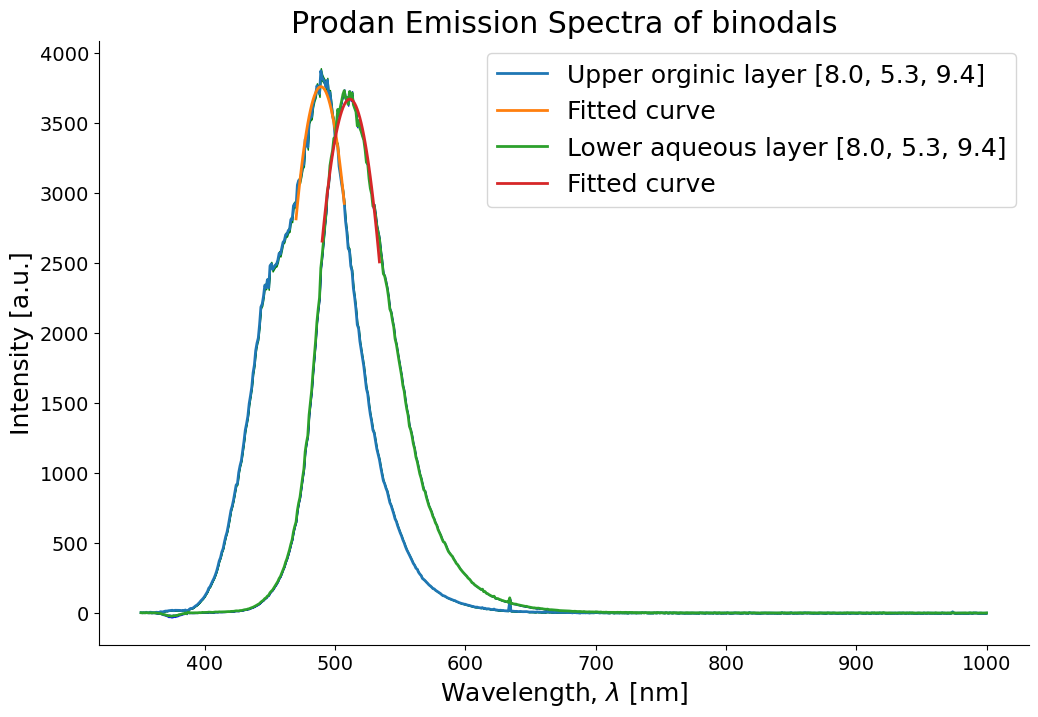

Upper ave. maximum wavelength for the sample is: 489.0735236599256 nm
Upper standard uncertainty for the max wavelength is: 0.037646316914593365
Lower ave. maximum wavelength for the sample is: 511.251123370193 nm
Lower standard uncertainty for the max wavelength is: 0.03248537094295853


In [35]:
initGuessu01 = [-0.5,-500,1800]

C_fitu01 = yld_curve_fit_Y(para_curve,fit_ave_wv_sampleu01,fit_ave_inten_sampleu01,initGuessu01)
f1_sampleu01 = C_fitu01[0]
max_wav_sampleu01 = C_fitu01[1]
cov_matrix_u01 = C_fitu01[2]
wav_uncertain_u01 = cov_matrix_u01[1][1]

initGuessl01 = [-0.5,-500,1800]

C_fitl01 = yld_curve_fit_Y(para_curve,fit_ave_wv_samplel01,fit_ave_inten_samplel01,initGuessl01)
f1_samplel01 = C_fitl01[0]
max_wav_samplel01 = C_fitl01[1]
cov_matrix_l01 = C_fitl01[2]
wav_uncertain_l01 = cov_matrix_l01[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.plot(ave_wv_sampleu01,ave_inten_sampleu01,marker = '',linestyle = '-',label = 'Upper orginic layer [8.0, 5.3, 9.4]')
plt.plot(fit_ave_wv_sampleu01,f1_sampleu01,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleu01, np.array(ave_inten_sampleu01)-np.array(std_inten_sampleu01),np.array(ave_inten_sampleu01)+np.array(std_inten_sampleu01), alpha=1, color = 'green')
plt.plot(ave_wv_samplel01,ave_inten_samplel01,marker = '',linestyle = '-',label = 'Lower aqueous layer [8.0, 5.3, 9.4]')
plt.plot(fit_ave_wv_samplel01,f1_samplel01,label = 'Fitted curve')
plt.fill_between(ave_wv_samplel01, np.array(ave_inten_samplel01)-np.array(std_inten_samplel01),np.array(ave_inten_samplel01)+np.array(std_inten_samplel01), alpha=1, color = 'blue')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Upper ave. maximum wavelength for the sample is:',max_wav_sampleu01,'nm')
print('Upper standard uncertainty for the max wavelength is:',wav_uncertain_u01)
print('Lower ave. maximum wavelength for the sample is:',max_wav_samplel01,'nm')
print('Lower standard uncertainty for the max wavelength is:',wav_uncertain_l01)

### For the upper and lower layer mixture Water: Toluene: Ethanol = [6.0, 4.6, 12.7]

In [36]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

upper_raw_sample02_01 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_01.csv',6)
upper_raw_sample02_02 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_02.csv',6)
upper_raw_sample02_03 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_03.csv',6)
upper_raw_sample02_04 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_04.csv',6)
upper_raw_sample02_05 = yld_rawdata(specFold+'up_6W_4.6T_12.7E_sample02_05.csv',6)

upper_wv_sample02_01,upper_inten_sample02_01 = yld_xy_sliced(upper_raw_sample02_01)
upper_wv_sample02_02,upper_inten_sample02_02 = yld_xy_sliced(upper_raw_sample02_02)
upper_wv_sample02_03,upper_inten_sample02_03 = yld_xy_sliced(upper_raw_sample02_03)
upper_wv_sample02_04,upper_inten_sample02_04 = yld_xy_sliced(upper_raw_sample02_04)
upper_wv_sample02_05,upper_inten_sample02_05 = yld_xy_sliced(upper_raw_sample02_05)

ave_wv_sampleu02 = np.array(upper_wv_sample02_01)
ave_inten_sampleu02 = []
std_inten_sampleu02 = []
for i in range(len(upper_inten_sample02_01)):
    singlewav_inten = [upper_inten_sample02_01[i],upper_inten_sample02_02[i],upper_inten_sample02_03[i],upper_inten_sample02_04[i],upper_inten_sample02_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sampleu02.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sampleu02.append(ave_singlewav)

sample_bg_u = 470
sample_end_u = 513

ave_wv_sampleu02 = ave_wv_sampleu02[ave_wv_sampleu02>sample_bg_u-1]
ave_wv_sampleu02 = ave_wv_sampleu02[ave_wv_sampleu02<sample_end_u+1]

fit_ave_wv_sampleu02 = ave_wv_sampleu02.tolist()
ave_wv_sampleu02 = upper_wv_sample02_01

index_start = ave_wv_sampleu02.index(fit_ave_wv_sampleu02[0])
index_end = ave_wv_sampleu02.index(fit_ave_wv_sampleu02[-1])

fit_ave_inten_sampleu02 =  ave_inten_sampleu02[index_start:index_end+1]

lower_raw_sample02_01 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_01.csv',6)
lower_raw_sample02_02 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_02.csv',6)
lower_raw_sample02_03 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_03.csv',6)
lower_raw_sample02_04 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_04.csv',6)
lower_raw_sample02_05 = yld_rawdata(specFold+'low_6W_4.6T_12.7E_sample02_05.csv',6)

lower_wv_sample02_01,lower_inten_sample02_01 = yld_xy_sliced(lower_raw_sample02_01)
lower_wv_sample02_02,lower_inten_sample02_02 = yld_xy_sliced(lower_raw_sample02_02)
lower_wv_sample02_03,lower_inten_sample02_03 = yld_xy_sliced(lower_raw_sample02_03)
lower_wv_sample02_04,lower_inten_sample02_04 = yld_xy_sliced(lower_raw_sample02_04)
lower_wv_sample02_05,lower_inten_sample02_05 = yld_xy_sliced(lower_raw_sample02_05)

ave_wv_samplel02 = np.array(lower_wv_sample02_01)
ave_inten_samplel02 = []
std_inten_samplel02 = []
for i in range(len(lower_inten_sample02_01)):
    singlewav_inten = [lower_inten_sample02_01[i],lower_inten_sample02_02[i],lower_inten_sample02_03[i],lower_inten_sample02_04[i],lower_inten_sample02_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_samplel02.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_samplel02.append(ave_singlewav)

sample_bg_l = 488
sample_end_l = 529

ave_wv_samplel02 = ave_wv_samplel02[ave_wv_samplel02>sample_bg_l-1]
ave_wv_samplel02 = ave_wv_samplel02[ave_wv_samplel02<sample_end_l+1]

fit_ave_wv_samplel02 = ave_wv_samplel02.tolist()
ave_wv_samplel02 = lower_wv_sample02_01

index_start = ave_wv_samplel02.index(fit_ave_wv_samplel02[0])
index_end = ave_wv_samplel02.index(fit_ave_wv_samplel02[-1])

fit_ave_inten_samplel02 =  ave_inten_samplel02[index_start:index_end+1]


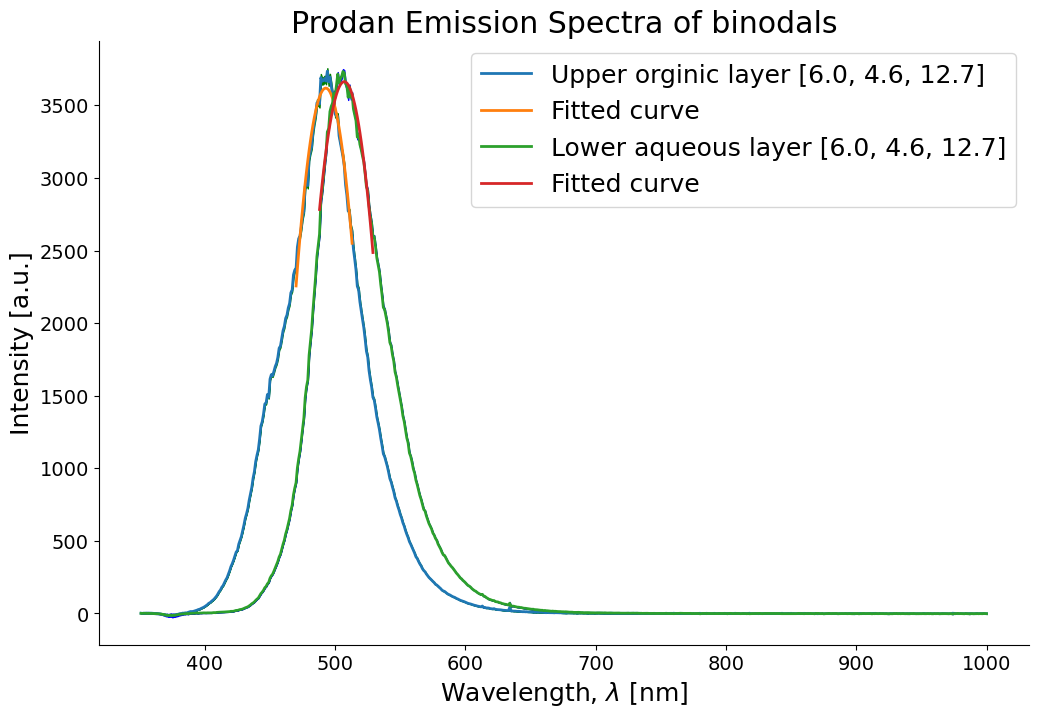

Upper ave. maximum wavelength for the sample is: 492.80284670903336 nm
Upper standard uncertainty for the max wavelength is: 0.02770593992794088
Lower ave. maximum wavelength for the sample is: 507.0144325550778 nm
Lower standard uncertainty for the max wavelength is: 0.03430430284193445


In [37]:
initGuessu02 = [-0.5,-500,1800]

C_fitu02 = yld_curve_fit_Y(para_curve,fit_ave_wv_sampleu02,fit_ave_inten_sampleu02,initGuessu02)
f1_sampleu02 = C_fitu02[0]
max_wav_sampleu02 = C_fitu02[1]
cov_matrix_u02 = C_fitu02[2]
wav_uncertain_u02 = cov_matrix_u02[1][1]

initGuessl02 = [-0.5,-500,1800]

C_fitl02 = yld_curve_fit_Y(para_curve,fit_ave_wv_samplel02,fit_ave_inten_samplel02,initGuessl02)
f1_samplel02 = C_fitl02[0]
max_wav_samplel02 = C_fitl02[1]
cov_matrix_l02 = C_fitl02[2]
wav_uncertain_l02 = cov_matrix_l02[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.plot(ave_wv_sampleu02,ave_inten_sampleu02,marker = '',linestyle = '-',label = 'Upper orginic layer [6.0, 4.6, 12.7]')
plt.plot(fit_ave_wv_sampleu02,f1_sampleu02,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleu02, np.array(ave_inten_sampleu02)-np.array(std_inten_sampleu02),np.array(ave_inten_sampleu02)+np.array(std_inten_sampleu02), alpha=1, color = 'green')
plt.plot(ave_wv_samplel02,ave_inten_samplel02,marker = '',linestyle = '-',label = 'Lower aqueous layer [6.0, 4.6, 12.7]')
plt.plot(fit_ave_wv_samplel02,f1_samplel02,label = 'Fitted curve')
plt.fill_between(ave_wv_samplel02, np.array(ave_inten_samplel02)-np.array(std_inten_samplel02),np.array(ave_inten_samplel02)+np.array(std_inten_samplel02), alpha=1, color = 'blue')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Upper ave. maximum wavelength for the sample is:',max_wav_sampleu02,'nm')
print('Upper standard uncertainty for the max wavelength is:',wav_uncertain_u02)
print('Lower ave. maximum wavelength for the sample is:',max_wav_samplel02,'nm')
print('Lower standard uncertainty for the max wavelength is:',wav_uncertain_l02)

### For the upper and lower layer mixture Water: Toluene: Ethanol = [3.0, 10.15, 10.4]

In [38]:
# csv file format is 'vol W_ vol T_ vol E_sample no_rep no'

upper_raw_sample03_01 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_01.csv',6)
upper_raw_sample03_02 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_02.csv',6)
upper_raw_sample03_03 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_03.csv',6)
upper_raw_sample03_04 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_04.csv',6)
upper_raw_sample03_05 = yld_rawdata(specFold+'up_3W_10.15T_10.4E_sample03_05.csv',6)

upper_wv_sample03_01,upper_inten_sample03_01 = yld_xy_sliced(upper_raw_sample03_01)
upper_wv_sample03_02,upper_inten_sample03_02 = yld_xy_sliced(upper_raw_sample03_02)
upper_wv_sample03_03,upper_inten_sample03_03 = yld_xy_sliced(upper_raw_sample03_03)
upper_wv_sample03_04,upper_inten_sample03_04 = yld_xy_sliced(upper_raw_sample03_04)
upper_wv_sample03_05,upper_inten_sample03_05 = yld_xy_sliced(upper_raw_sample03_05)

ave_wv_sampleu03 = np.array(upper_wv_sample03_01)
ave_inten_sampleu03 = []
std_inten_sampleu03 = []
for i in range(len(upper_inten_sample03_01)):
    singlewav_inten = [upper_inten_sample03_01[i],upper_inten_sample03_02[i],upper_inten_sample03_03[i],upper_inten_sample03_04[i],upper_inten_sample03_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_sampleu03.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_sampleu03.append(ave_singlewav)

sample_bg_u = 475
sample_end_u = 516

ave_wv_sampleu03 = ave_wv_sampleu03[ave_wv_sampleu03>sample_bg_u-1]
ave_wv_sampleu03 = ave_wv_sampleu03[ave_wv_sampleu03<sample_end_u+1]

fit_ave_wv_sampleu03 = ave_wv_sampleu03.tolist()
ave_wv_sampleu03 = upper_wv_sample03_01

index_start = ave_wv_sampleu03.index(fit_ave_wv_sampleu03[0])
index_end = ave_wv_sampleu03.index(fit_ave_wv_sampleu03[-1])

fit_ave_inten_sampleu03 =  ave_inten_sampleu03[index_start:index_end+1]

lower_raw_sample03_01 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_01.csv',6)
lower_raw_sample03_02 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_02.csv',6)
lower_raw_sample03_03 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_03.csv',6)
lower_raw_sample03_04 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_04.csv',6)
lower_raw_sample03_05 = yld_rawdata(specFold+'low_3W_10.15T_10.4E_sample03_05.csv',6)

lower_wv_sample03_01,lower_inten_sample03_01 = yld_xy_sliced(lower_raw_sample03_01)
lower_wv_sample03_02,lower_inten_sample03_02 = yld_xy_sliced(lower_raw_sample03_02)
lower_wv_sample03_03,lower_inten_sample03_03 = yld_xy_sliced(lower_raw_sample03_03)
lower_wv_sample03_04,lower_inten_sample03_04 = yld_xy_sliced(lower_raw_sample03_04)
lower_wv_sample03_05,lower_inten_sample03_05 = yld_xy_sliced(lower_raw_sample03_05)

ave_wv_samplel03 = np.array(lower_wv_sample03_01)
ave_inten_samplel03 = []
std_inten_samplel03 = []
for i in range(len(lower_inten_sample03_01)):
    singlewav_inten = [lower_inten_sample03_01[i],lower_inten_sample03_02[i],lower_inten_sample03_03[i],lower_inten_sample03_04[i],lower_inten_sample03_05[i]]
    std_singlewav = np.std(singlewav_inten)
    std_inten_samplel03.append(std_singlewav)
    ave_singlewav = sum(singlewav_inten)/len(singlewav_inten)
    ave_inten_samplel03.append(ave_singlewav)

sample_bg_l = 485
sample_end_l = 529

ave_wv_samplel03 = ave_wv_samplel03[ave_wv_samplel03>sample_bg_l-1]
ave_wv_samplel03 = ave_wv_samplel03[ave_wv_samplel03<sample_end_l+1]

fit_ave_wv_samplel03 = ave_wv_samplel03.tolist()
ave_wv_samplel03 = lower_wv_sample03_01

index_start = ave_wv_samplel03.index(fit_ave_wv_samplel03[0])
index_end = ave_wv_samplel03.index(fit_ave_wv_samplel03[-1])

fit_ave_inten_samplel03 =  ave_inten_samplel03[index_start:index_end+1]

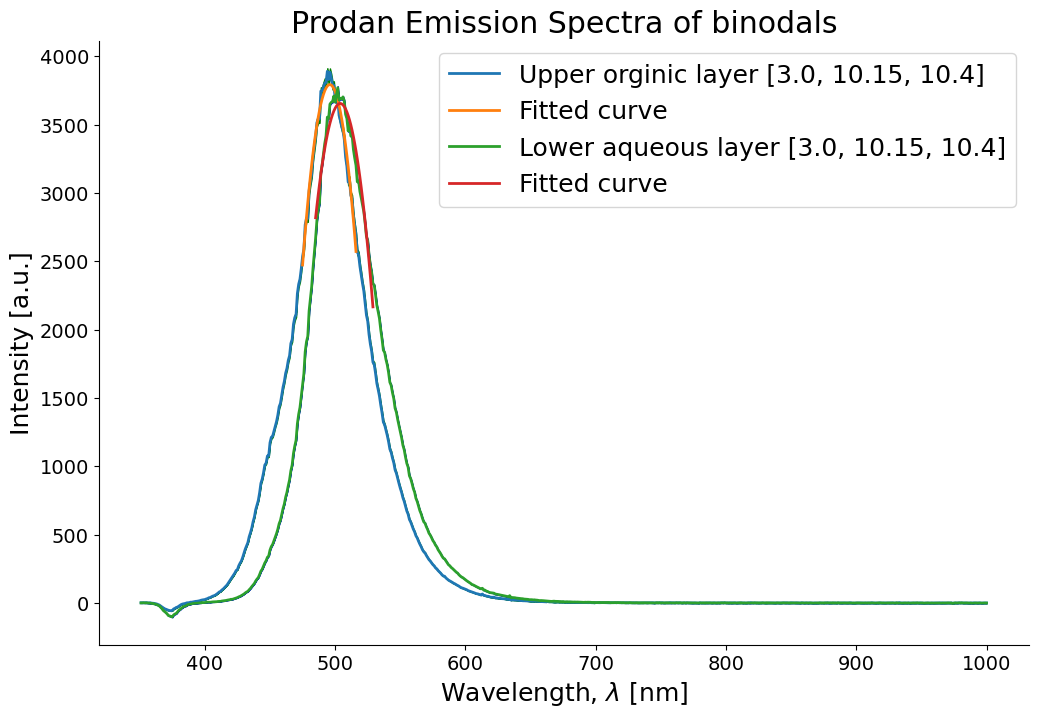

Upper ave. maximum wavelength for the sample is: 495.89951599842004 nm
Upper standard uncertainty for the max wavelength is: 0.016839379679224074
Lower ave. maximum wavelength for the sample is: 503.8524282969403 nm
Lower standard uncertainty for the max wavelength is: 0.06400272904683295


In [39]:
initGuessu03 = [-0.5,-500,1800]

C_fitu03 = yld_curve_fit_Y(para_curve,fit_ave_wv_sampleu03,fit_ave_inten_sampleu03,initGuessu03)
f1_sampleu03 = C_fitu03[0]
max_wav_sampleu03 = C_fitu03[1]
cov_matrix_u03 = C_fitu03[2]
wav_uncertain_u03 = cov_matrix_u03[1][1]

initGuessl03 = [-0.5,-500,1800]

C_fitl03 = yld_curve_fit_Y(para_curve,fit_ave_wv_samplel03,fit_ave_inten_samplel03,initGuessl03)
f1_samplel03 = C_fitl03[0]
max_wav_samplel03 = C_fitl03[1]
cov_matrix_l03 = C_fitl03[2]
wav_uncertain_l03 = cov_matrix_l03[1][1]

fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.plot(ave_wv_sampleu03,ave_inten_sampleu03,marker = '',linestyle = '-',label = 'Upper orginic layer [3.0, 10.15, 10.4]')
plt.plot(fit_ave_wv_sampleu03,f1_sampleu03,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleu03, np.array(ave_inten_sampleu03)-np.array(std_inten_sampleu03),np.array(ave_inten_sampleu03)+np.array(std_inten_sampleu03), alpha=1, color = 'green')
plt.plot(ave_wv_samplel03,ave_inten_samplel03,marker = '',linestyle = '-',label = 'Lower aqueous layer [3.0, 10.15, 10.4]')
plt.plot(fit_ave_wv_samplel03,f1_samplel03,label = 'Fitted curve')
plt.fill_between(ave_wv_samplel03, np.array(ave_inten_samplel03)-np.array(std_inten_samplel03),np.array(ave_inten_samplel03)+np.array(std_inten_samplel03), alpha=1, color = 'blue')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

print('Upper ave. maximum wavelength for the sample is:',max_wav_sampleu03,'nm')
print('Upper standard uncertainty for the max wavelength is:',wav_uncertain_u03)
print('Lower ave. maximum wavelength for the sample is:',max_wav_samplel03,'nm')
print('Lower standard uncertainty for the max wavelength is:',wav_uncertain_l03)

## R-value determinations

In [40]:
upper_ave_wav_samples = [max_wav_sampleu01,max_wav_sampleu02,max_wav_sampleu03]
upper_std_wav_samples = [wav_uncertain_u01,wav_uncertain_u02,wav_uncertain_u03]
lower_ave_wav_samples = [max_wav_samplel01,max_wav_samplel02,max_wav_samplel03]
lower_std_wav_samples = [wav_uncertain_l01,wav_uncertain_l02,wav_uncertain_l03]

print(upper_ave_wav_samples)
print(upper_std_wav_samples)
print(lower_ave_wav_samples)
print(lower_std_wav_samples)

[489.0735236599256, 492.80284670903336, 495.89951599842004]
[0.037646316914593365, 0.02770593992794088, 0.016839379679224074]
[511.251123370193, 507.0144325550778, 503.8524282969403]
[0.03248537094295853, 0.03430430284193445, 0.06400272904683295]


$R=\frac{\lambda_{e}-\lambda_{n}}{\lambda_{n+1}-\lambda_{n}}$ 

where $\lambda_{n}<\lambda_{e}<\lambda_{n+1}$

In [41]:
binodal_ave_wav_samples = [422.9355043525796, 490.5, 496.9, 499.2, 499.86613118560126, 503.2291860278595, 503.4, 505.27211932698685, 510.8732689650792, 525.8761978466658]
upper_list_calcs = []
lower_list_calcs = []
upper_R_val = []
lower_R_val = []
for i in upper_ave_wav_samples:
    print('Upper wavelength considered:',i)
    mod_list = binodal_ave_wav_samples + [i]
    mod_list.sort()
    print(mod_list)
    i_upper_sample = mod_list.index(i)

    λe = i
    λn = mod_list[i_upper_sample-1]
    λn1 = mod_list[i_upper_sample+1]

    print('λe:',λe)
    print('λn:',λn)
    print('λn+1:',λn1)

    R_val = (λe-λn)/(λn1-λn)
    print(R_val)
    upper_R_val.append(R_val)
    upper_list_calcs.append([λn,λe,λn1])

for i in lower_ave_wav_samples:
    print('Lower wavelength considered:',i)
    mod_list = binodal_ave_wav_samples + [i]
    mod_list.sort()
    print(mod_list)
    i_lower_sample = mod_list.index(i)

    λe = i
    λn = mod_list[i_lower_sample-1]
    λn1 = mod_list[i_lower_sample+1]

    print('λe:',λe)
    print('λn:',λn)
    print('λn+1:',λn1)

    R_val = (λe-λn)/(λn1-λn)
    print(R_val)
    lower_R_val.append(R_val)
    lower_list_calcs.append([λn,λe,λn1])

Upper wavelength considered: 489.0735236599256
[422.9355043525796, 489.0735236599256, 490.5, 496.9, 499.2, 499.86613118560126, 503.2291860278595, 503.4, 505.27211932698685, 510.8732689650792, 525.8761978466658]
λe: 489.0735236599256
λn: 422.9355043525796
λn+1: 490.5
0.9788871902852895
Upper wavelength considered: 492.80284670903336
[422.9355043525796, 490.5, 492.80284670903336, 496.9, 499.2, 499.86613118560126, 503.2291860278595, 503.4, 505.27211932698685, 510.8732689650792, 525.8761978466658]
λe: 492.80284670903336
λn: 490.5
λn+1: 496.9
0.3598197982864639
Upper wavelength considered: 495.89951599842004
[422.9355043525796, 490.5, 495.89951599842004, 496.9, 499.2, 499.86613118560126, 503.2291860278595, 503.4, 505.27211932698685, 510.8732689650792, 525.8761978466658]
λe: 495.89951599842004
λn: 490.5
λn+1: 496.9
0.8436743747531347
Lower wavelength considered: 511.251123370193
[422.9355043525796, 490.5, 496.9, 499.2, 499.86613118560126, 503.2291860278595, 503.4, 505.27211932698685, 510.873

In [42]:
print(upper_list_calcs)
print(lower_list_calcs)
print(upper_R_val)
print(lower_R_val)

[[422.9355043525796, 489.0735236599256, 490.5], [490.5, 492.80284670903336, 496.9], [490.5, 495.89951599842004, 496.9]]
[[510.8732689650792, 511.251123370193, 525.8761978466658], [505.27211932698685, 507.0144325550778, 510.8732689650792], [503.4, 503.8524282969403, 505.27211932698685]]
[0.9788871902852895, 0.3598197982864639, 0.8436743747531347]
[0.025185376008650014, 0.31106350314974796, 0.24166637800191304]


In [43]:
for i in range(len(upper_R_val)):
    λe = upper_list_calcs[i][1]
    λn = upper_list_calcs[i][0]
    λn1 = upper_list_calcs[i][2]
    R_val = upper_R_val[i]

    print('Table format for the upper R value is:','|', λn, '|',λe, '|',λn1,'|',R_val,'|')

for i in range(len(lower_R_val)):
    λe = lower_list_calcs[i][1]
    λn = lower_list_calcs[i][0]
    λn1 = lower_list_calcs[i][2]
    R_val = lower_R_val[i]

    print('Table format for the lower R value is:','|', λn, '|',λe, '|',λn1,'|',R_val,'|')

Table format for the upper R value is: | 422.9355043525796 | 489.0735236599256 | 490.5 | 0.9788871902852895 |
Table format for the upper R value is: | 490.5 | 492.80284670903336 | 496.9 | 0.3598197982864639 |
Table format for the upper R value is: | 490.5 | 495.89951599842004 | 496.9 | 0.8436743747531347 |
Table format for the lower R value is: | 510.8732689650792 | 511.251123370193 | 525.8761978466658 | 0.025185376008650014 |
Table format for the lower R value is: | 505.27211932698685 | 507.0144325550778 | 510.8732689650792 | 0.31106350314974796 |
Table format for the lower R value is: | 503.4 | 503.8524282969403 | 505.27211932698685 | 0.24166637800191304 |


Upper phase R-values

| $\lambda_{n}$ | $\lambda_{e}$ | $\lambda_{n+1}$ | R value |
|:-:|:-:|:-:|:-:|
| 422.9355043525796 | 489.0735236599256 | 490.5 | 0.9788871902852895 |
| 490.5 | 492.80284670903336 | 496.9 | 0.3598197982864639 |
| 490.5 | 495.89951599842004 | 496.9 | 0.8436743747531347 |


Lower phase R-values

| $\lambda_{n}$ | $\lambda_{e}$ | $\lambda_{n+1}$ | R value |
|:-:|:-:|:-:|:-:|
| 510.8732689650792 | 511.251123370193 | 525.8761978466658 | 0.025185376008650014 |
| 505.27211932698685 | 507.0144325550778 | 510.8732689650792 | 0.31106350314974796 |
| 503.4 | 503.8524282969403 | 505.27211932698685 | 0.24166637800191304 |

## Plot all the data on the same graph.

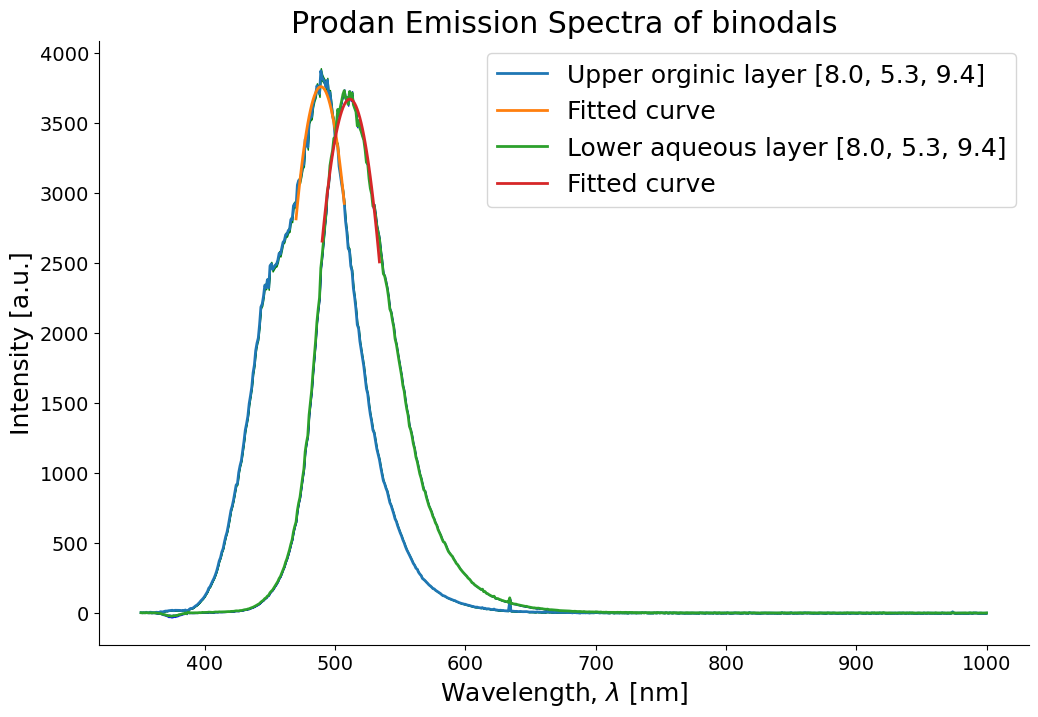

In [47]:
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.plot(ave_wv_sampleu01,ave_inten_sampleu01,marker = '',linestyle = '-',label = 'Upper orginic layer [8.0, 5.3, 9.4]')
plt.plot(fit_ave_wv_sampleu01,f1_sampleu01,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleu01, np.array(ave_inten_sampleu01)-np.array(std_inten_sampleu01),np.array(ave_inten_sampleu01)+np.array(std_inten_sampleu01), alpha=1, color = 'green')
plt.plot(ave_wv_samplel01,ave_inten_samplel01,marker = '',linestyle = '-',label = 'Lower aqueous layer [8.0, 5.3, 9.4]')
plt.plot(fit_ave_wv_samplel01,f1_samplel01,label = 'Fitted curve')
plt.fill_between(ave_wv_samplel01, np.array(ave_inten_samplel01)-np.array(std_inten_samplel01),np.array(ave_inten_samplel01)+np.array(std_inten_samplel01), alpha=1, color = 'blue')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

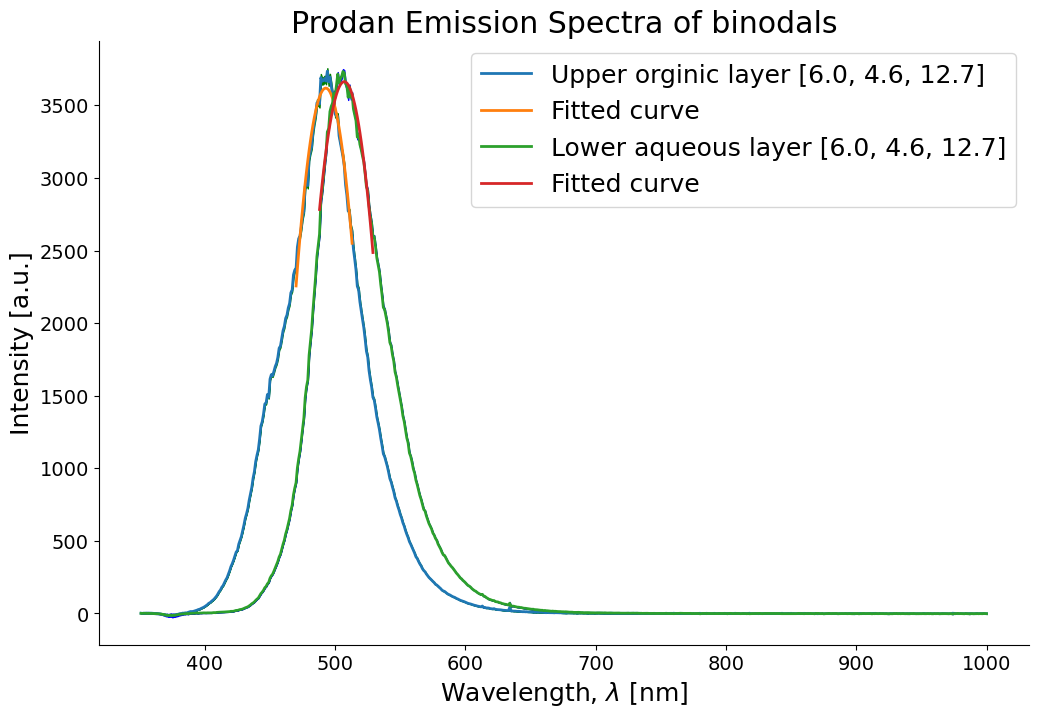

In [48]:
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.plot(ave_wv_sampleu02,ave_inten_sampleu02,marker = '',linestyle = '-',label = 'Upper orginic layer [6.0, 4.6, 12.7]')
plt.plot(fit_ave_wv_sampleu02,f1_sampleu02,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleu02, np.array(ave_inten_sampleu02)-np.array(std_inten_sampleu02),np.array(ave_inten_sampleu02)+np.array(std_inten_sampleu02), alpha=1, color = 'green')
plt.plot(ave_wv_samplel02,ave_inten_samplel02,marker = '',linestyle = '-',label = 'Lower aqueous layer [6.0, 4.6, 12.7]')
plt.plot(fit_ave_wv_samplel02,f1_samplel02,label = 'Fitted curve')
plt.fill_between(ave_wv_samplel02, np.array(ave_inten_samplel02)-np.array(std_inten_samplel02),np.array(ave_inten_samplel02)+np.array(std_inten_samplel02), alpha=1, color = 'blue')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()

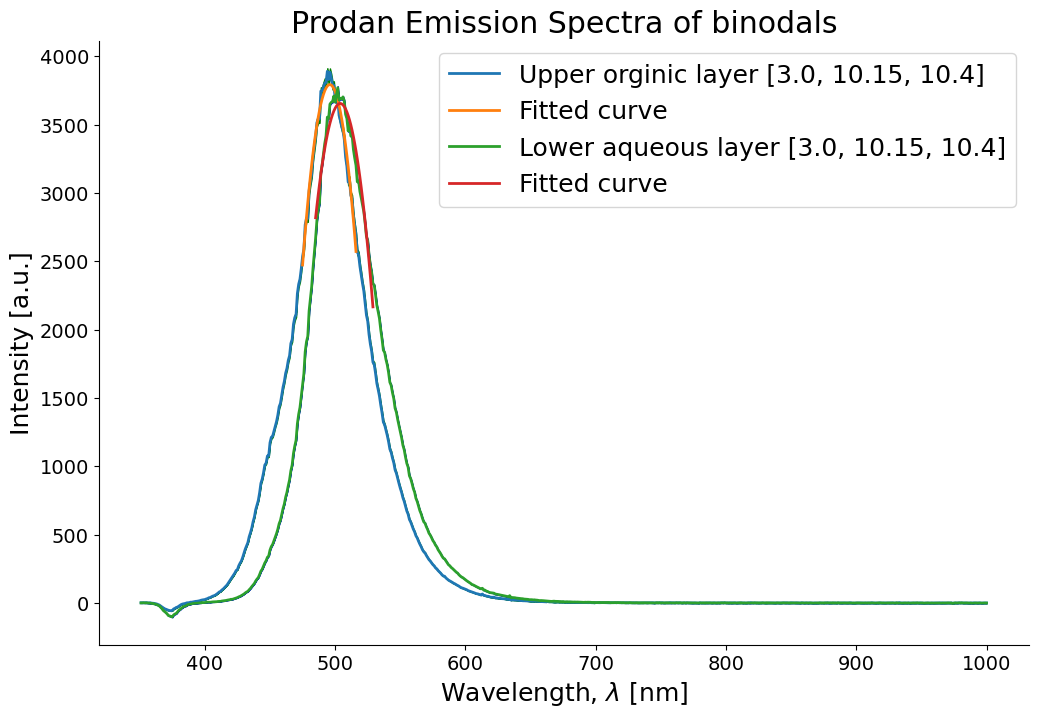

In [49]:
fig1 = plt.figure(facecolor='white')
ax1 = plt.axes(frameon=True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.plot(ave_wv_sampleu03,ave_inten_sampleu03,marker = '',linestyle = '-',label = 'Upper orginic layer [3.0, 10.15, 10.4]')
plt.plot(fit_ave_wv_sampleu03,f1_sampleu03,label = 'Fitted curve')
plt.fill_between(ave_wv_sampleu03, np.array(ave_inten_sampleu03)-np.array(std_inten_sampleu03),np.array(ave_inten_sampleu03)+np.array(std_inten_sampleu03), alpha=1, color = 'green')
plt.plot(ave_wv_samplel03,ave_inten_samplel03,marker = '',linestyle = '-',label = 'Lower aqueous layer [3.0, 10.15, 10.4]')
plt.plot(fit_ave_wv_samplel03,f1_samplel03,label = 'Fitted curve')
plt.fill_between(ave_wv_samplel03, np.array(ave_inten_samplel03)-np.array(std_inten_samplel03),np.array(ave_inten_samplel03)+np.array(std_inten_samplel03), alpha=1, color = 'blue')

plt.legend(loc = 'best')
plt.title('Prodan Emission Spectra of binodals')
plt.xlabel('Wavelength, $\lambda$ [nm]')
plt.ylabel('Intensity [a.u.]')
plt.show()